# 1) Prepare a classification model using Naive Bayes for salary data 

In [33]:
# Importing necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Naive Bayes\SalaryData_Train.csv')

# Exploratory Data Analysis

In [12]:
data.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(30161, 14)

There are 30161 instances and 14 attributes in the data set.

In [9]:
data.dtypes.value_counts()

object    9
int64     5
dtype: int64

# Types of Variables:

## 1. Categorical Variables

In [13]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical varaibles are :\n\n', categorical)

There are 9 categorical variables

The categorical varaibles are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [6]:
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [7]:
data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

There are no missing values in the categorical variables

In [14]:
# checking labels in workclass variable
data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [9]:
# checking frequency distribution of values in workclass variable
data.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [17]:
# Count of unique keys/labels in categorical variables
for var in categorical:
    print(f"{var} contains {data[var].nunique()} labels")

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


## 2. Numerical Variables

In [11]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [12]:
data[numerical].head(5)

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [13]:
data[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

There are no missing values

# Feature Vector and Target Variable

In [14]:
data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [20]:
X = data.drop(['Salary'], axis=1)
y = data['Salary']

# Splitting X and y into Training and Testing sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

# Feature Engineering

In [24]:
# display categorical variables
categorical = [var for var in X_train.columns if X_train[var].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [19]:
# display numerical variables
numerical = [col for col in X.columns if X[col].dtypes != 'O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [26]:
# ! pip install category_encoders
import category_encoders as ce

In [27]:
# encoding remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_test.head(2)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We now have training and testing set ready for building the model

# Feature Scaling

In [23]:
cols = X_train.columns   # extracting the column names from the training data (X_train) and storing them in the variable 'cols'

In [24]:
# Standardizing or Normalizing the features using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train

array([[ 0.89473684,  1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.84210526,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.36842105,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.68421053,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63157895,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15789474,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Maping all the feature variables onto the same scale

In [26]:
X_test

array([[-0.84210526,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.84210526,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.63157895,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.73684211,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
# Creating a Training dataFrame upon feature scaling
X_train = pd.DataFrame(X_train, columns=[cols])

In [28]:
# Creating a Testing dataFrame upon feature scaling
X_test = pd.DataFrame(X_test, columns=[cols])

In [29]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


X_train dataset is ready to be fed into the Gaussian Naive Bayes classifier.

# Model Training

In [30]:
# training Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()    # instantiate the model
gnb.fit(X_train, y_train)   # fitting the model

GaussianNB()

In [31]:
# Predicting the results
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

# Evaluating Accuracy Score 'Pred vs Actual' on the Test set

In [32]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7995


In [33]:
# using the trained GNB model to make predictions on the training set (X_train). 
y_pred_train = gnb.predict(X_train)

# The predictions are stored in the variable y_pred_train
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8023


In [35]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8023
Test set score: 0.7995


# Summarizing the performance of the Model using Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

# y_test and y_pred are the true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5422 1376]
 [ 438 1813]]


1. True Positives(TP) =  5422
2. True Negatives(TN) =  1813
3. False Positives(FP) =  1376
4. False Negatives(FN) =  438

# Visualizing the Model Accuracy

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



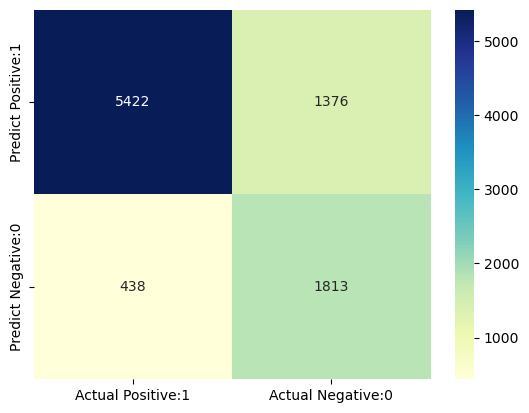

In [38]:
# Using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


# Using Clasification Metrices
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Conclusion:
1. The model yields a very good performance as the accuracy was found to be 0.8083.
2. Both the Scores of Training and Testing are quite comparable as the Training set score was 0.8023 and 
   the Test set score was 0.7995. 
3. The Model using Confusion Matrix and Classification Metrices with weighted avg above 0.80 was quite accurate.